### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Preparação remota de estados

A preparação remota de estados (PRE) é uma variante do protocolo de teleportação quântica. Na PRE o estado $|\psi\rangle$ do quanton de Alice é conhecido, e Alice e Bob querem preparar um quanton no laboratório distante de Bob no estado $|\psi\rangle$.

## Exemplo
Consideremos que o qubit de Alice está preparado no estado 
$$|\psi\rangle_{A'} = 2^{-1/2}\big(|0\rangle_{A'} + e^{i\phi}|1\rangle_{A'}\big).$$
Como no protocolo de teleportação, consideraremos inicialmente que Alice e Bob compartilham um estado maximamente emaranhado de 2 qubits:
$$|\Phi\rangle_{AB} = 2^{-1/2}\big(|00\rangle_{AB}+|11\rangle_{AB}\big).$$
O estado inicial dos 3 qubits é

Conhecendo o estado $|\psi\rangle$, Alice faz uma medida no qubit $A$ na base
$$\big\{|\psi^{*}\rangle_{A},|\psi^{*}_{\perp}\rangle_{A}\big\} = \big\{2^{-1/2}\big(|0\rangle_{A'} + e^{-i\phi}|1\rangle_{A'}\big),2^{-1/2}\big(|0\rangle_{A'} - e^{-i\phi}|1\rangle_{A'}\big)\big\}.$$

Se Alice obtém $|\psi^{*}\rangle_{A}$ na medida, o estado pós-medida será proporcional a
\begin{align}
& (|\psi^{*}\rangle_{A}\langle\psi^{*}|\otimes\mathbb{I}_{B}\big)|\Phi\rangle_{AB} = (|\psi^{*}\rangle_{A}\langle\psi^{*}|\otimes\mathbb{I}_{B}\big)2^{-1/2}\big(|00\rangle_{AB}+|11\rangle_{AB}\big) \\
& = 2^{-1/2}\big(|\psi^{*}\rangle_{A}\langle\psi^{*}|0\rangle_{A}\otimes|0\rangle_{B}+|\psi^{*}\rangle_{A}\langle\psi^{*}|1\rangle_{A}\otimes|1\rangle_{B}\big) \\
& = 2^{-1}|\psi^{*}\rangle_{A}\otimes\big(|0\rangle_{B}+e^{i\phi}|1\rangle_{B}\big) \\
& = 2^{-1/2}|\psi^{*}\rangle_{A}\otimes|\psi\rangle_{B}.
\end{align}
Nesse caso o qubit de Bob acaba no estado desejado, sem necessitar de nenhuma operação local.

Agora, se Alice obtém $|\psi^{*}_{\perp}\rangle_{A}$ na sua medida, o estado pós-medida será proporcional a
\begin{align}
& (|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|\otimes\mathbb{I}_{B}\big)|\Phi\rangle_{AB} = (|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|\otimes\mathbb{I}_{B}\big)2^{-1/2}\big(|00\rangle_{AB}+|11\rangle_{AB}\big) \\
& = 2^{-1/2}\big(|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|0\rangle_{A}\otimes|0\rangle_{B}+|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|1\rangle_{A}\otimes|1\rangle_{B}\big) \\
& = 2^{-1}|\psi^{*}_{\perp}\rangle_{A}\otimes\big(|0\rangle_{B}-e^{i\phi}|1\rangle_{B}\big) \\
& = 2^{-1/2}|\psi^{*}_{\perp}\rangle_{A}\otimes Z_{B}|\psi\rangle_{B}.
\end{align}
Neste caso, para preparar o estado certo, Bob tem que aplicar $Z$ no seu qubit.

Vemos assim que, para esta classe particular de estados no equador da esfera de Bloch, se Alice conhece o estado $|\psi\rangle$ a ser preparado (conhece $\phi$) e Alice e Bob compartilham um estado maximamente emaranhado, eles conseguem preparar o qubit de Bob no estado $|\psi\rangle$ se Alice faz medidas na base $\big\{|\psi^{*}\rangle_{A},|\psi^{*}_{\perp}\rangle_{A}\big\}$ e envia um cbit para Bob informando o resultado
\begin{align}
& |\psi^{*}\rangle_{A} \rightarrow 0 \rightarrow \mathbb{I}_{B} \rightarrow |\psi\rangle_{B}, \\
& |\psi^{*}_{\perp}\rangle_{A} \rightarrow 1 \rightarrow Z_{B} \rightarrow |\psi\rangle_{B}.
\end{align}

Alguns artigos forma publicados sobre PRE com estados mistos e o papel da discórdia quântica, e não do emaranhamento, neste caso:
- B. Dakic et al., “Quantum discord as resource for remote state preparation,” Nature Phys. 8, 666 (2012).
- G. L. Giorgi, “Quantum discord and remote state preparation,” Phys. Rev. A 88, 022315 (2013).



### Simulação no IBMQ
Vamos considerar 
$$\phi=\pi/2\ \therefore\ |\psi\rangle = 2^{-1/2}\big(|0\rangle+i|1\rangle\big) = |\oplus\rangle.$$
Assim
\begin{align}
& |\psi^{*}\rangle = 2^{-1/2}\big(|0\rangle-i|1\rangle\big) = |\ominus\rangle, \\
& |\psi^{*}_{\perp}\rangle = 2^{-1/2}\big(|0\rangle+i|1\rangle\big) = |\oplus\rangle.
\end{align}

In [63]:
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_bogota')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor, backend_overview, backend_monitor
from qiskit.tools.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2022-06-28 11:17:19,003: Credentials are already in use. The existing account in the session will be replaced.


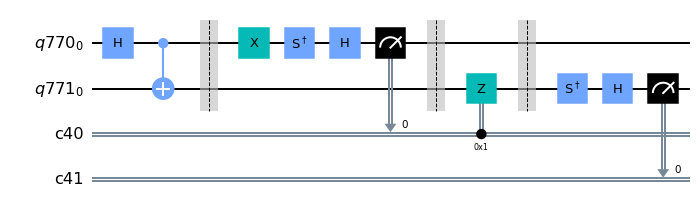

In [64]:
q0 = QuantumRegister(1); q1 = QuantumRegister(1)
c0 = ClassicalRegister(1); c1 = ClassicalRegister(1)
qc = QuantumCircuit(q0,q1,c0,c1)
qc.h(q0); qc.cx(q0,q1) # emaranhamento compartilhado entre Alice e Bob
qc.barrier()
qc.x(q0); qc.sdg(q0); qc.h(q0); qc.measure(q0,c0) # Medida de Alice
qc.barrier()
qc.z(q1).c_if(c0, 1) # acao de Bob condicionada no cbit enviado por Alice
qc.barrier()
qc.sdg(q1); qc.h(q1); qc.measure(q1,c1) # passa da base circular pra computacional
qc.draw(output='mpl')

In [65]:
jobS = execute(qc, backend = simulator, shots = nshots)

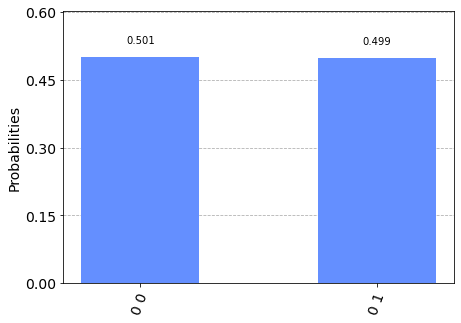

In [67]:
plot_histogram(jobS.result().get_counts(qc))

## Preparação remota de um estado qualquer de 1 qubit?
Vamos considerar o protocolo de preparação remota para um estado qualquer
$$|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle.$$
Neste caso
$$|\psi^{*}\rangle = \cos(\theta/2)|0\rangle + e^{-i\phi}\sin(\theta/2)|1\rangle$$
e
$$|\psi^{*}_{\perp}\rangle = e^{i\phi}\sin(\theta/2)|0\rangle - \cos(\theta/2)|1\rangle.$$

O estado pós-medida será proporcional a
\begin{align}
& (|\psi^{*}\rangle_{A}\langle\psi^{*}|\otimes\mathbb{I}_{B}\big)|\Phi\rangle_{AB} = (|\psi^{*}\rangle_{A}\langle\psi^{*}|\otimes\mathbb{I}_{B}\big)2^{-1/2}\big(|00\rangle_{AB}+|11\rangle_{AB}\big) \\
& = 2^{-1/2}\big(|\psi^{*}\rangle_{A}\langle\psi^{*}|0\rangle_{A}\otimes|0\rangle_{B}+|\psi^{*}\rangle_{A}\langle\psi^{*}|1\rangle_{A}\otimes|1\rangle_{B}\big) \\
& = 2^{-1/2}|\psi^{*}\rangle_{A}\otimes\big(\cos(\theta/2)|0\rangle_{B}+e^{i\phi}\sin(\theta/2)|1\rangle_{B}\big) \\
& = 2^{-1/2}|\psi^{*}\rangle_{A}\otimes|\psi\rangle_{B}.
\end{align}

ou
\begin{align}
& (|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|\otimes\mathbb{I}_{B}\big)|\Phi\rangle_{AB} = (|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|\otimes\mathbb{I}_{B}\big)2^{-1/2}\big(|00\rangle_{AB}+|11\rangle_{AB}\big) \\
& = 2^{-1/2}\big(|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|0\rangle_{A}\otimes|0\rangle_{B}+|\psi^{*}_{\perp}\rangle_{A}\langle\psi^{*}_{\perp}|1\rangle_{A}\otimes|1\rangle_{B}\big) \\
& = 2^{-1}|\psi^{*}_{\perp}\rangle_{A}\otimes\big(e^{-i\phi}\sin(\theta/2)|0\rangle_{B}-\cos(\theta/2)|1\rangle_{B}\big) \\
& = 2^{-1/2}|\psi^{*}_{\perp}\rangle_{A}\otimes Z_{B}X_{B}|\psi^{*}\rangle_{B}.
\end{align}
O problema aqui é que não tem uma operação local de Bob que troca 
$$e^{-i\phi}\rightarrow e^{i\phi},$$
ou tem (__exercício__)?

considerar mandar phi e aplicar P(phi) = diminui no. cbits

### Outra possibilidade para estado geral de 1 qubit
Estado no equador definido por uma direção qualquer
$$|\psi\rangle_{A'} = 2^{-1/2}\big(|n_{+}\rangle_{A'} + e^{i\phi}|n_{-}\rangle_{A'}\big).$$
Usar como canal quântico
$$|\Psi_{-}\rangle_{AB} = 2^{-1/2}\big(|n_{+}n_{-}\rangle_{AB}-|n_{-}n_{+}\rangle_{AB}\big).$$

Das contas que fizemos, é possível preparar remotamente estados no equador de qualquer direção $\hat{n}$, mas para que seja vantajoso usar PRE Alice e Bob devem ter compartilhado de antemão esse referencial.